<a href="https://colab.research.google.com/github/ramrajv/AI_Fin/blob/main/news_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install newspaper3k
!pip install GoogleNews
!pip install nltk

     |████████████████████████████████| 215kB 5.7MB/s 
     |████████████████████████████████| 92kB 5.6MB/s 
     |████████████████████████████████| 7.4MB 7.4MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp37-none-any.whl size=13538 sha256=063e734d4a02641327b550adaae8578525e6592c24566dee312b27e00d75d8fe
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp37-none-any.whl size=3358 sha256=0e144f9ff9bd47fa8c4e7b30c340c120e3f6c533e8256725a459264d28e893e9
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp37-none-any.whl size=7398406 sha256=b1a4fa1eb66b307fd8fd733ce82c9a69033bccb11dd2cb246bb766db66d68a3e
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from GoogleNews import GoogleNews
from newspaper import Article
from newspaper import Config
from wordcloud import WordCloud, STOPWORDS

nltk.download('vader_lexicon') #required for Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
now = dt.date.today()
now = now.strftime('%m-%d-%Y')
yesterday = dt.date.today() - dt.timedelta(days = 1)
yesterday = yesterday.strftime('%m-%d-%Y')

nltk.download('punkt')
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:78.0) Gecko/20100101 Firefox/78.0'
config = Config()
config.browser_user_agent = user_agent
config.request_timeout = 10


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# save the company name in a variable
company_name = input("Please provide the name of the Company or a Ticker: ")
#As long as the company name is valid not empty...
if company_name != '':
    print(f'Searching for and analyzing {company_name}, Please be patient, it might take a while...')

    #Extract News with Google News
    googlenews = GoogleNews(start=yesterday,end=now)
    googlenews.search(company_name)
    result = googlenews.result()
    #store the results
    df = pd.DataFrame(result)
    print(df)


Please provide the name of the Company or a Ticker: BPCL
Searching for and analyzing BPCL, Please be patient, it might take a while...
                                               title  ...                                                img
0  Large COVID-19 treatment centre up on BPCL campus  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...
1  BPCL supplies oxygen and utilities for Covid t...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...
2  BPCL to offer upto 1,500 beds in make-shift CO...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...
3  BPCL, Kerala govt set up makeshift hospital wi...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...
4  BPCL supplies oxygen, utilities to make-shift ...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...
5  BPCL to provide free Oxygen, power to make-shi...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...
6  Petrol and diesel prices today remains stable ...  ...  data:image/gif;base64,R0lGODlhAQABAIAAAP///

In [ ]:
try:
    list =[] #creating an empty list 
    for i in df.index:
        dict = {} #creating an empty dictionary to append an article in every single iteration
        article = Article(df['link'][i],config=config) #providing the link
        try:
          article.download() #downloading the article 
          article.parse() #parsing the article
          article.nlp() #performing natural language processing (nlp)
        except:
           pass 
        #storing results in our empty dictionary
        dict['Date']=df['date'][i] 
        dict['Media']=df['media'][i]
        dict['Title']=article.title
        dict['Article']=article.text
        dict['Summary']=article.summary
        dict['Key_words']=article.keywords
        list.append(dict)
    check_empty = not any(list)
    # print(check_empty)
    if check_empty == False:
      news_df=pd.DataFrame(list) #creating dataframe
      print(news_df)

except Exception as e:
    #exception handling
    print("exception occurred:" + str(e))
    print('Looks like, there is some error in retrieving the data, Please try again or try with a different ticker.' )


           Date  ...                                          Key_words
0  17 hours ago  ...  [tonnes, beds, treatment, oxygen, district, co...
1     1 day ago  ...  [tonnes, oxygen, treatment, hospitals, bpcl, u...
2  23 hours ago  ...  [provide, oxygen, makeshift, covid, reach, off...
3   29 mins ago  ...  [oxygen, makeshift, 1500, district, covid, hos...
4  21 hours ago  ...  [tonnes, water, facility, oxygen, makeshift, t...
5     1 day ago  ...  [provide, oxygen, makeshift, treatment, hospit...
6   4 hours ago  ...  [corporation, petroleum, oil, petrol, price, r...
7     1 day ago  ...  [key, effective, research, share, product, reg...
8  22 hours ago  ...  [industry, retail, research, manomet, marathon...
9  16 hours ago  ...                                                 []

[10 rows x 6 columns]


Positive Sentiment: 7.00
Neutral Sentiment: 1.00
Negative Sentiment: 2.00


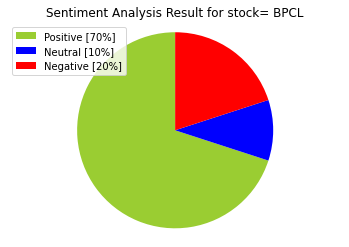

Wordcloud for BPCL


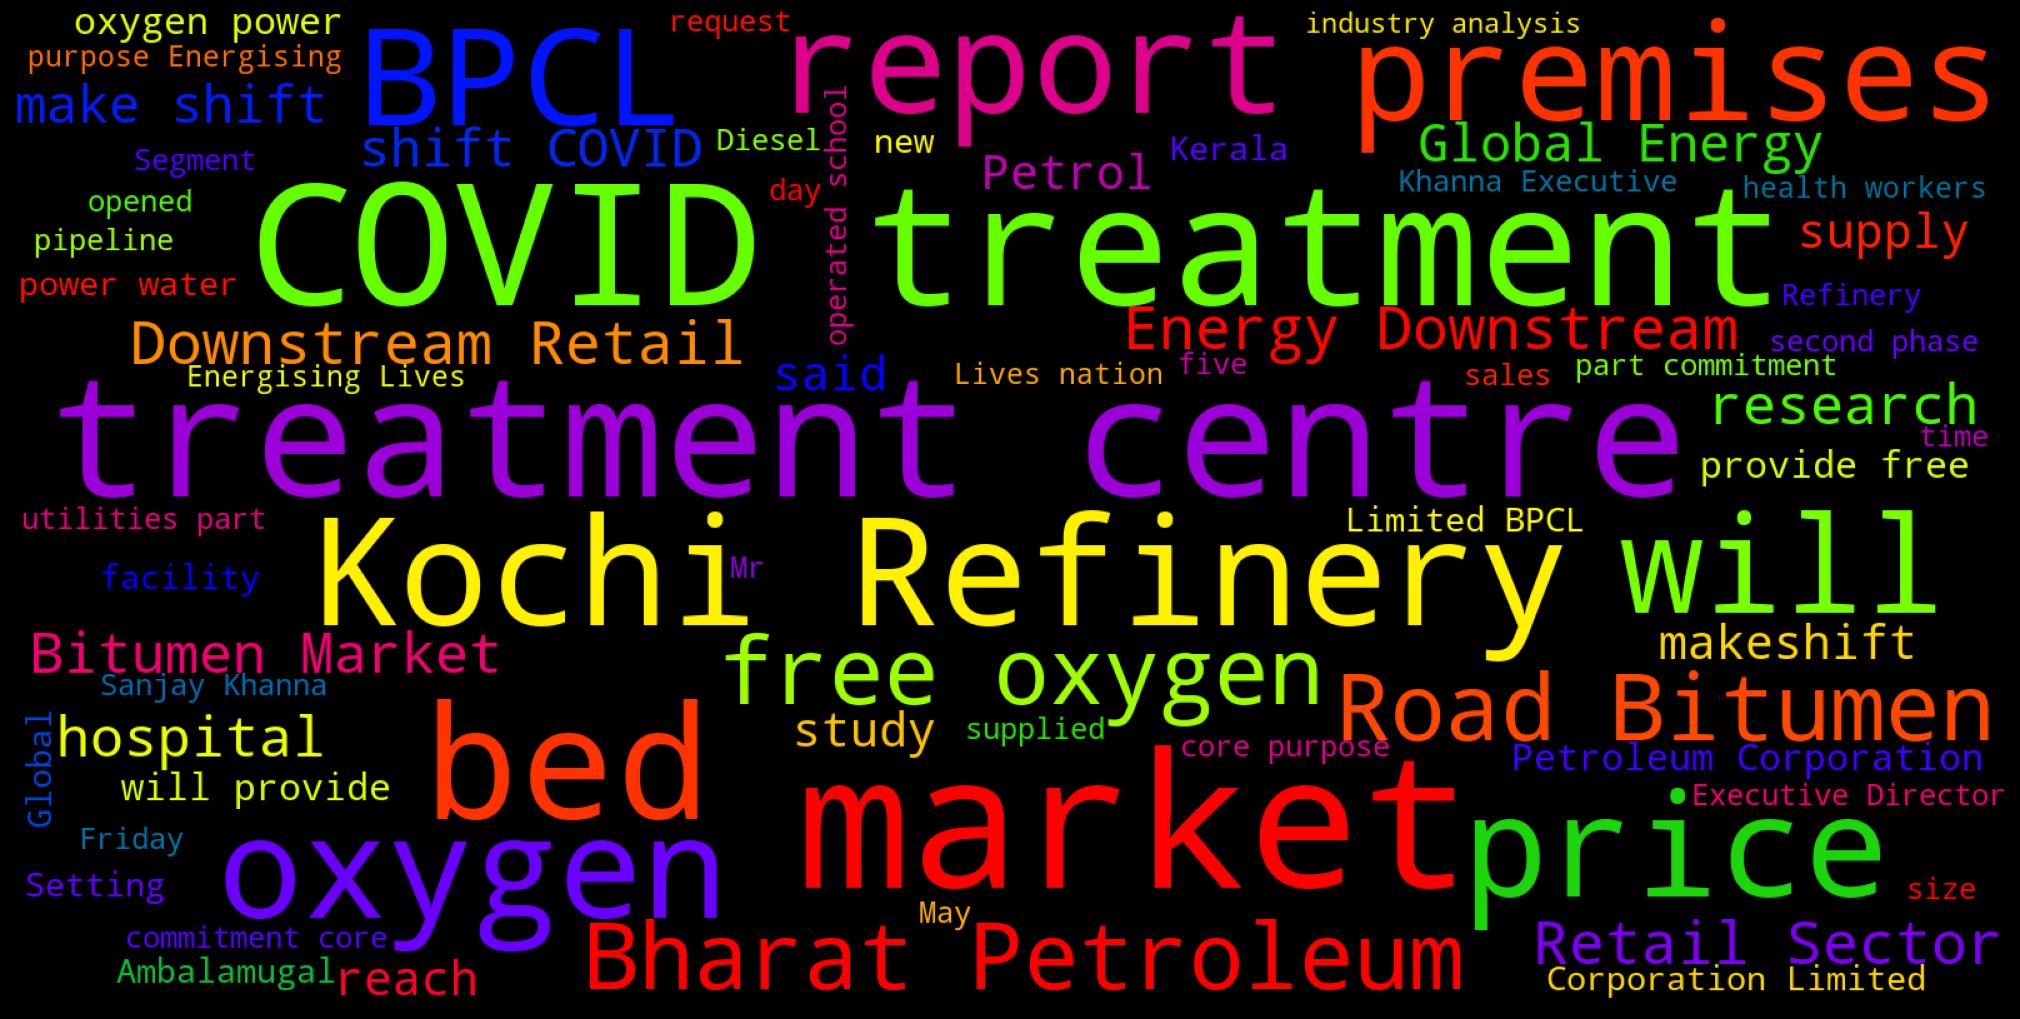

In [ ]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0
#Creating empty lists
news_list = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe
for news in news_df['Summary']:
    news_list.append(news)
    analyzer = SentimentIntensityAnalyzer().polarity_scores(news)
    neg = analyzer['neg']
    neu = analyzer['neu']
    pos = analyzer['pos']
    comp = analyzer['compound']

    if neg > pos:
        negative_list.append(news) #appending the news that satisfies this condition
        negative += 1 #increasing the count by 1
    elif pos > neg:
        positive_list.append(news) #appending the news that satisfies this condition
        positive += 1 #increasing the count by 1
    elif pos == neg:
        neutral_list.append(news) #appending the news that satisfies this condition
        neutral += 1 #increasing the count by 1 

positive = percentage(positive, len(news_df)) #percentage is the function defined above
negative = percentage(negative, len(news_df))
neutral = percentage(neutral, len(news_df))

#Converting lists to pandas dataframe
news_list = pd.DataFrame(news_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
#using len(length) function for counting
print("Positive Sentiment:", '%.2f' % len(positive_list), end='\n')
print("Neutral Sentiment:", '%.2f' % len(neutral_list), end='\n')
print("Negative Sentiment:", '%.2f' % len(negative_list), end='\n')

#Creating PieCart
labels = ['Positive ['+str(round(positive))+'%]' , 'Neutral ['+str(round(neutral))+'%]','Negative ['+str(round(negative))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for stock= "+company_name+"" )
plt.axis('equal')
plt.show()

# Word cloud visualization
def word_cloud(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([nws for nws in text])
    wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

print('Wordcloud for ' + company_name)
word_cloud(news_df['Summary'].values)
